# 1. Extract data

In [22]:
import pandas as pd
data=pd.read_csv("C:\\Users\\KIIT\\Desktop\\ML Practice\\Dataset\\Machine Learning A-Z (Codes and Datasets)\\Part 3 - Classification\\Section 18 - Naive Bayes\\Python\\Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# 2. EDA

In [23]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [25]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# 3. Feature extraction

In [26]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [27]:
print(x)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [28]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


# 4. Model building

In [29]:
# Split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (280, 2)
y_train shape :  (280,)
x_test shape :  (120, 2)
y_test shape :  (120,)


In [30]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [31]:
print(x_train)

[[-1.1631724  -1.5849703 ]
 [ 2.17018137  0.93098672]
 [ 0.0133054   1.22017719]
 [ 0.20938504  1.07558195]
 [ 0.40546467 -0.48604654]
 [-0.28081405 -0.31253226]
 [ 0.99370357 -0.8330751 ]
 [ 0.99370357  1.8563962 ]
 [ 0.0133054   1.24909623]
 [-0.86905295  2.26126285]
 [-1.1631724  -1.5849703 ]
 [ 2.17018137 -0.80415605]
 [-1.35925203 -1.46929411]
 [ 0.40546467  2.2901819 ]
 [ 0.79762394  0.75747245]
 [-0.96709276 -0.31253226]
 [ 0.11134522  0.75747245]
 [-0.96709276  0.55503912]
 [ 0.30742485  0.06341534]
 [ 0.69958412 -1.26686079]
 [-0.47689368 -0.0233418 ]
 [-1.7514113   0.3526058 ]
 [-0.67297331  0.12125343]
 [ 0.40546467  0.29476771]
 [-0.28081405  0.06341534]
 [-0.47689368  2.2901819 ]
 [ 0.20938504  0.03449629]
 [ 1.28782302  2.20342476]
 [ 0.79762394  0.26584866]
 [-0.28081405  0.15017248]
 [ 0.0133054  -0.54388463]
 [-0.18277423  0.15017248]
 [-0.08473441  0.23692961]
 [ 0.0133054  -0.25469417]
 [ 2.17018137  1.104501  ]
 [-1.7514113   0.3526058 ]
 [ 1.87606192  0.12125343]
 

In [32]:
print(x_test)

[[-0.77101313  0.49720103]
 [ 0.0133054  -0.57280368]
 [-0.28081405  0.15017248]
 [-0.77101313  0.26584866]
 [-0.28081405 -0.57280368]
 [-1.06513258 -1.44037507]
 [-0.67297331 -1.5849703 ]
 [-0.18277423  2.14558666]
 [-1.94749093 -0.05226085]
 [ 0.89566375 -0.775237  ]
 [-0.77101313 -0.60172273]
 [-0.96709276 -0.42820845]
 [-0.08473441 -0.42820845]
 [ 0.11134522  0.20801057]
 [-1.7514113   0.46828198]
 [-0.5749335   1.36477242]
 [-0.08473441  0.20801057]
 [-1.84945111  0.43936294]
 [ 1.67998229  1.74072002]
 [-0.28081405 -1.38253697]
 [-0.28081405 -0.65956082]
 [ 0.89566375  2.14558666]
 [ 0.30742485 -0.54388463]
 [ 0.89566375  1.01774386]
 [-1.45729185 -1.2090227 ]
 [ 1.09174339  2.05882953]
 [-0.96709276  0.49720103]
 [-0.86905295  0.29476771]
 [-0.08473441 -0.22577513]
 [-0.5749335   0.46828198]
 [-1.65337148  0.52612008]
 [-0.08473441  0.26584866]
 [ 1.87606192 -0.28361322]
 [-0.08473441 -0.48604654]
 [-1.35925203 -0.34145131]
 [-1.94749093 -0.51496559]
 [-1.55533166  0.32368675]
 

In [33]:
# Train data
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

# 5. Model evaluation

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,f1_score,r2_score,accuracy_score
import numpy as np
test_acc=model.score(x_test,y_test)
train_acc=model.score(x_train,y_train)
print("Test accuracy : ",test_acc)
print("Train accuracy : ",train_acc)

y_pred=model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mae : ",mae)
print("mse : ",mse)
print("rmse : ",rmse)

Test accuracy :  0.8916666666666667
Train accuracy :  0.8857142857142857
mae :  0.10833333333333334
mse :  0.10833333333333334
rmse :  0.32914029430219166


# 6. Result visualization

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15292\1512967560.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(("red","green"))(i),label=j)


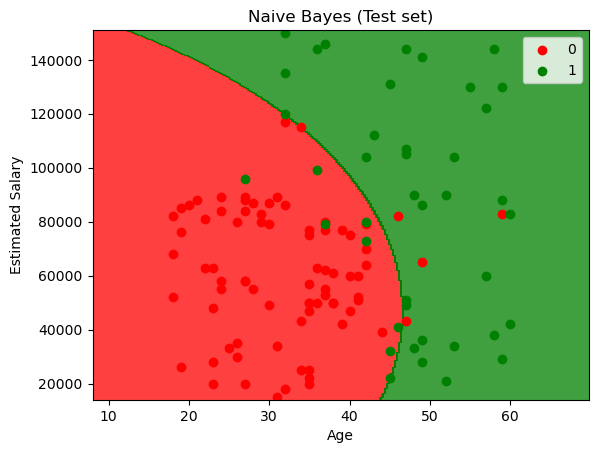

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x_set=sc.inverse_transform(x_test)
y_set=y_test

x1,x2=np.meshgrid(np.arange(x_set[:,0].min()-10,x_set[:,0].max()+10,0.25),
                  np.arange(x_set[:,1].min()-1000,x_set[:,1].max()+1000,0.25))
#x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
#                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

plt.contourf(x1,x2,model.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75,cmap=ListedColormap(("red","green")))
#plt.contourf(x1, x2, model.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
#             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(("red","green"))(i),label=j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()